In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Load the data
df = pd.read_csv('cleandata.csv')


In [27]:
# feature creation
df['Engagement Score']=df['Total Time Spent on Website']/df['TotalVisits']
df['Engagement Score'] = df['Engagement Score'].fillna(0).astype(int)
df['Do Not Contact'] = df.apply(lambda row: 1 if row['Do Not Email'] == 1 or row['Do Not Call'] == 1 else 0, axis=1)
print(df.head())

                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0            0   
1  Organic Search             0            0          0            5   
2  Direct Traffic             0            0          1            2   
3  Direct Traffic             0            0          0            1   
4          Google             0            0          1            2   

   Total Time Spent on Website  Page Views Per Visit  ...    Lead Profile  \
0  

In [28]:
# feature bucketing
df['Total Time Spent on Website'] = pd.qcut(df['Total Time Spent on Website'], 
                                                     q=3, labels=['Low', 'Medium', 'High'],
                                                     duplicates='drop')
df['Total Time Spent on Website'] = df['Total Time Spent on Website'].map({'Low':1,'Medium':2,'High':3})

df['Page Views Per Visit']=pd.qcut(df['Page Views Per Visit'],q=3,labels=['Low','Medium','High'])
df['Page Views Per Visit']=df['Page Views Per Visit'].map({'Low':1,'Medium':2,'High':3})

In [ ]:
# feature transformaion

df['Activity Score'] = df['Asymmetrique Activity Index'].map({'Low':1,'Medium':2,'High':3})
df['Profile Score'] = df['Asymmetrique Profile Index'].map({'Low':1,'Medium':2,'High':3})

# Apply Label Encoding to categorical columns
label_enc = LabelEncoder()
df['Lead Origin']=label_enc.fit_transform(df['Lead Origin'])
df['Lead Source']=label_enc.fit_transform(df['Lead Source'])
df['Country'] = label_enc.fit_transform(df['Country'])
df['Specialization'] = label_enc.fit_transform(df['Specialization'])
df['What is your current occupation'] = label_enc.fit_transform(df['What is your current occupation'])
df['Lead Quality'] = label_enc.fit_transform(df['Lead Quality'])
df['Lead Profile']= label_enc.fit_transform(df['Lead Profile'])

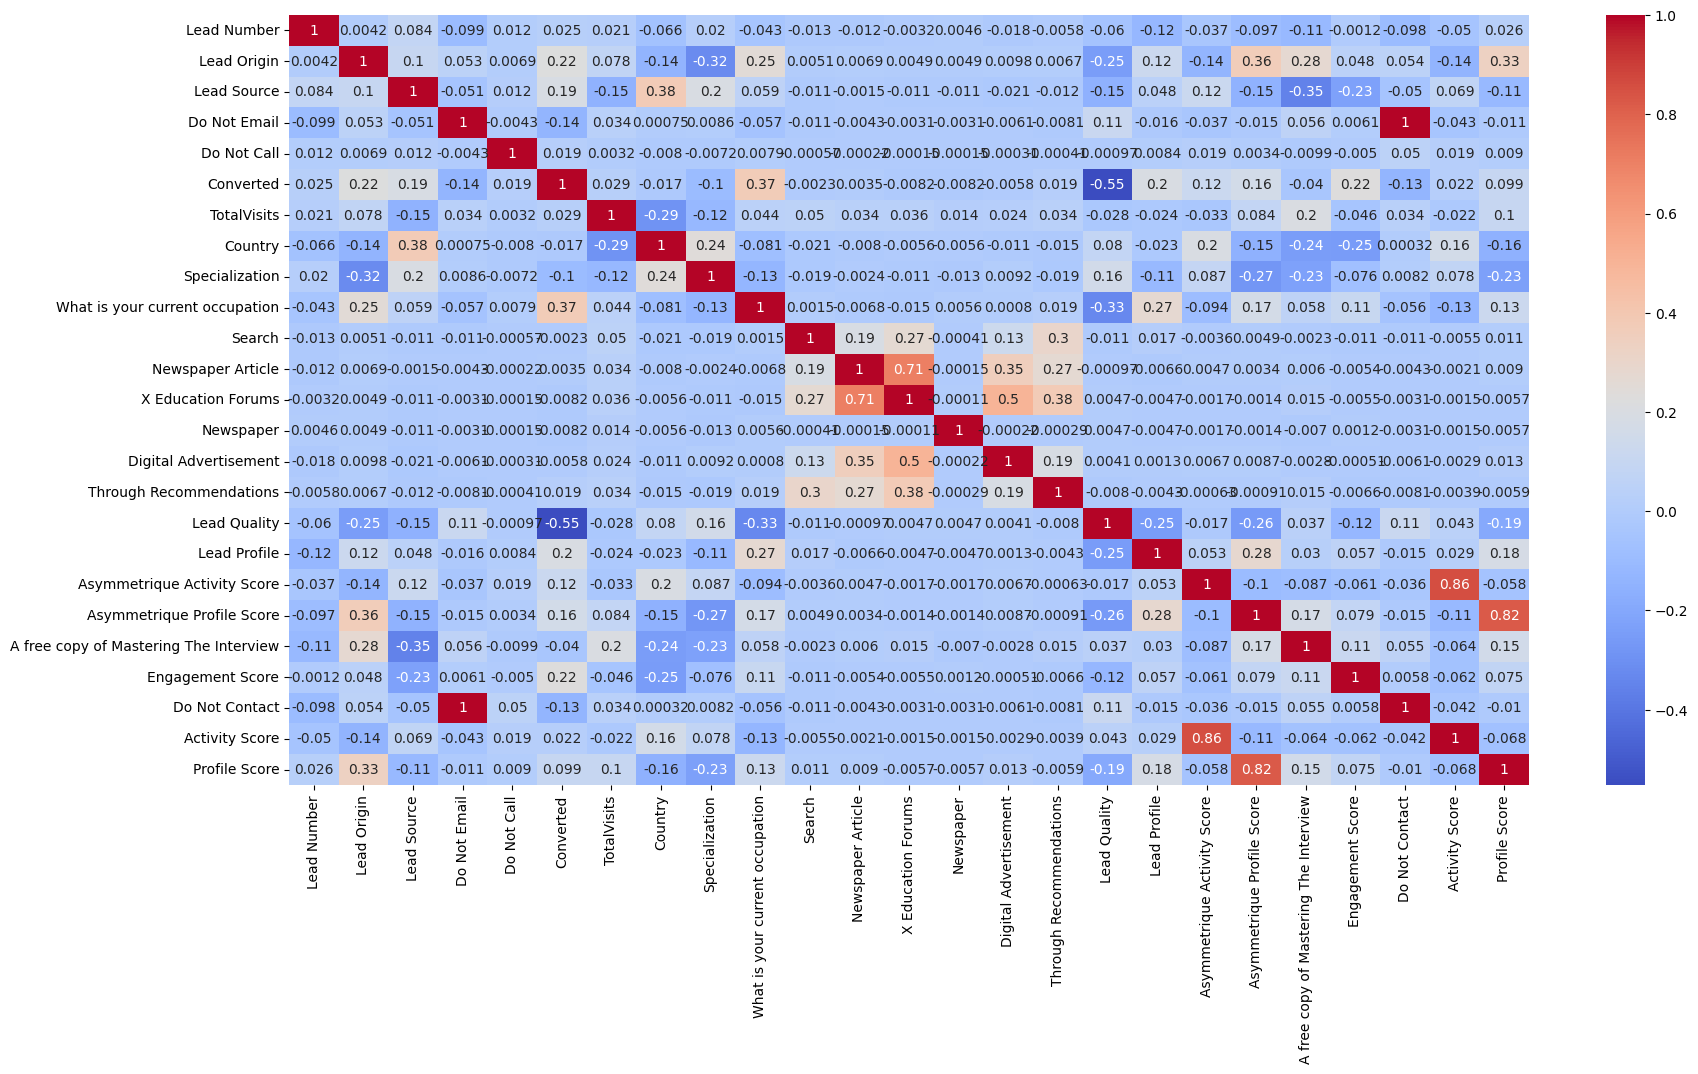

In [30]:
# feature correlation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_numerical_col=df.select_dtypes(include=[np.number])
correlation = df_numerical_col.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [31]:
# feature selection

selected_features=['Prospect ID','Lead Origin','Lead Source','Do Not Contact','Converted','Engagement Score','Page Views Per Visit','Country','Specialization','What is your current occupation','Lead Quality','Lead Profile','Activity Score','Profile Score','A free copy of Mastering The Interview']
df_select = df[selected_features]

In [32]:
df_select.to_csv('updated_model_features.csv', index=False)

print(df_select.head())

                            Prospect ID  Lead Origin  Lead Source  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620            0            6   
1  2a272436-5132-4136-86fa-dcc88c88f482            0            7   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a            1            1   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc            1            1   
4  3256f628-e534-4826-9d63-4a8b88782852            1            3   

   Do Not Contact  Converted  Engagement Score Page Views Per Visit  Country  \
0               0          0                 0                    1       22   
1               0          0               134                    2       12   
2               0          1               766                    2       12   
3               0          0               305                    1       12   
4               0          1               714                    1       12   

   Specialization  What is your current occupation  Lead Quality  \
0              13                   